In [1]:

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import pandas as pd
import csv
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from scipy.signal import butter, filtfilt
import matplotlib.cm as cm
# import the required packages into the current environment
import sys, os
from matplotlib import pyplot
import spm1d
import glob
import re
#import tensorflow as tf

In [13]:
#df = pd.read_excel(r"c:\Users\Point Loma\Desktop\V3D Exports\will_trial_10.xlsx")   
df = pd.read_excel(r"C:\Users\Point Loma\Documents\V3D Exports\will_trial_10.xlsx")
x = df['tip_x']
y = df['tip_y']
z = df['tip_z']
r = (x**2+y**2+z**2)**(1/2)

theta_rad = np.arctan2(y,x)
theta = theta_rad*180/np.pi
phi_rad = np.arctan2(z,x)
phi = phi_rad*180/np.pi

t = df['frames ']

In [14]:

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
def unwrap_angle(rad):
    unwrapped = np.rad2deg(np.unwrap(rad))
    return unwrapped

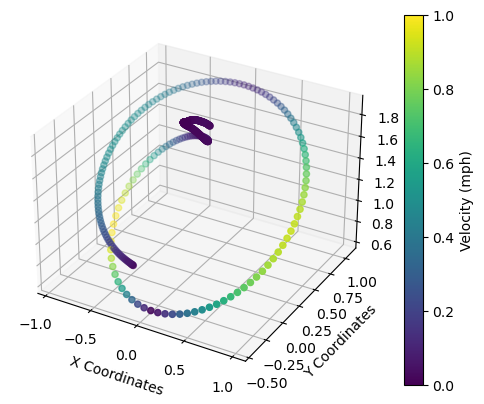

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import cm

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Calculate velocity in m/s and convert it to mph
velocity_mps = np.sqrt(np.gradient(y)**2 + np.gradient(z)**2)  # Velocity in m/s
velocity_mph = velocity_mps * 2.23694  # Convert velocity to mph

# Normalize velocity for color mapping
velocity_normalized = (velocity_mph - velocity_mph.min()) / (velocity_mph.max() - velocity_mph.min())

# Scatter plot initialization
sc = ax.scatter(x, y, z, c=velocity_normalized, cmap=cm.viridis)

# Setting labels
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Z Coordinates')

# Adding a color bar
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Velocity (mph)')

# Update function for the animation
def update(frame):
    ax.view_init(elev=10, azim=frame)
    return sc,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50, blit=False)

# Show the animation
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Z')

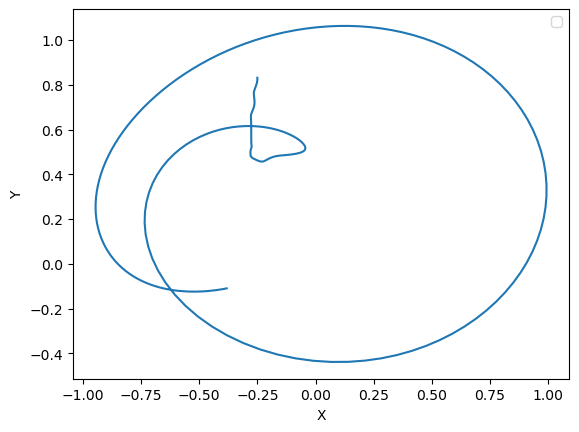

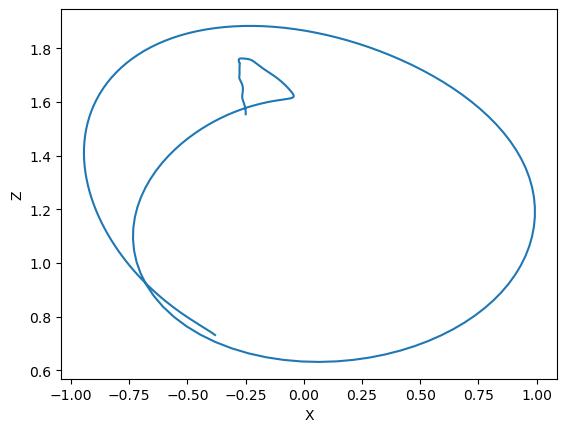

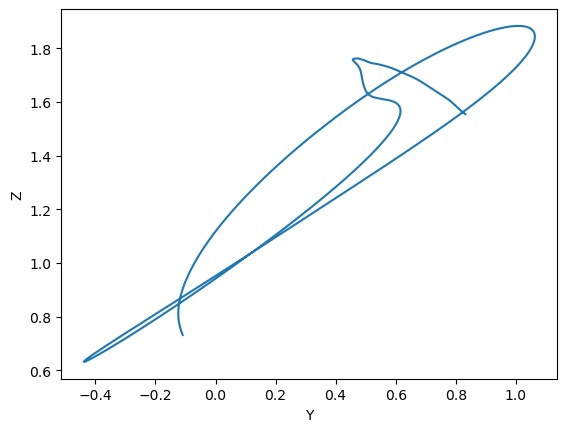

In [5]:
plt.figure()
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()




plt.figure()
plt.plot(x,z)
plt.xlabel('X')
plt.ylabel('Z')


plt.figure()
plt.plot(y,z)
plt.xlabel('Y')
plt.ylabel('Z')

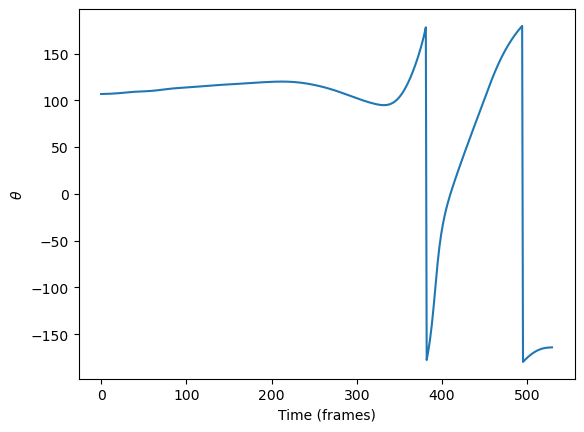

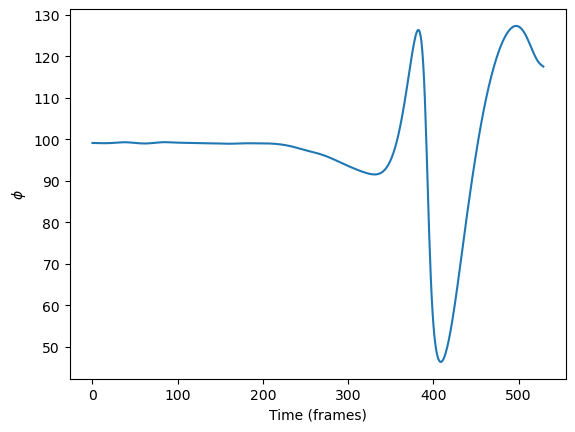

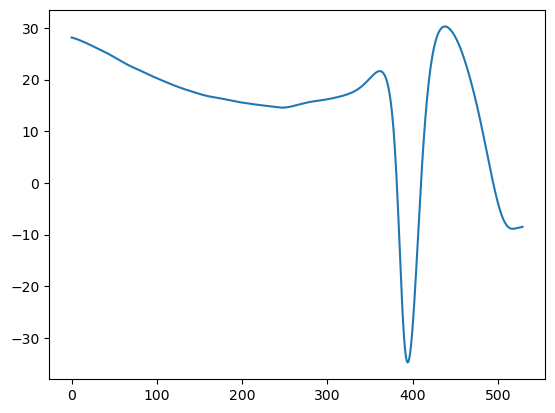

In [6]:
plt.figure()
plt.plot(t,theta)
plt.xlabel('Time (frames)')
plt.ylabel(r'$\theta$')

plt.figure()
plt.plot(t,phi)
plt.xlabel('Time (frames)')
plt.ylabel(r'$\phi$')



plt.figure()
a_rad = np.arctan2(y,z)
a = unwrap_angle(a_rad)
plt.plot(t,a)

C:\Users\Point Loma\AppData\Local\Temp\ipykernel_1924\4262872372.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['270°', '315°', '0°', '45°', '90°', '135°', '180°', '225°'])


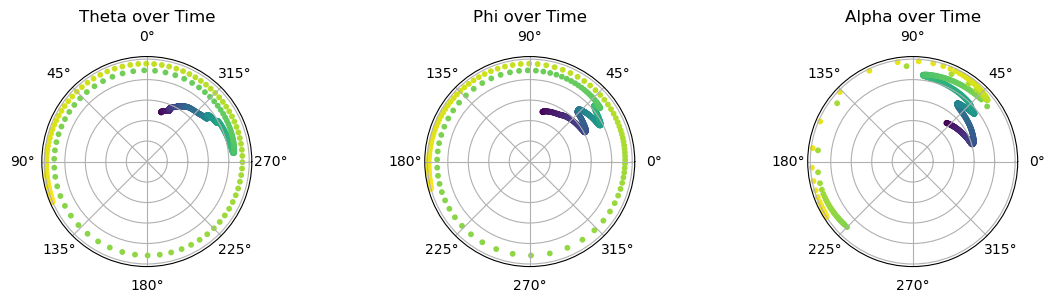

In [7]:

#df = pd.read_excel(r"c:\Users\Point Loma\Desktop\V3D Exports\will_trial_10.xlsx")   


df.columns = df.columns.str.strip()  # Strip whitespace from column names

tip_x = df['tip_1x']
tip_y = df['tip_1y']
tip_z = df['tip_1z']

knob_x = df['knob_1x']
knob_y = df['knob_1y']
knob_z = df['knob_1z']

bat_x = knob_x - tip_x
bat_y = knob_y - tip_y
bat_z = knob_z - tip_z


# Calculate angles
theta_rad = np.arctan2(bat_y, bat_x)  # Correct calculation for full circle handling
theta = np.degrees(theta_rad)  # Convert radians to degrees
phi = np.degrees(np.arctan2(bat_z,bat_x))  # Avoid division by zero
alpha = np.degrees(np.arctan2(bat_z,bat_y))  # Avoid division by zero

# Ensure the column 'frames' is correctly referenced
t = df['frames']  # Directly using 'frames' without extra space

# Normalize time for color mapping
normalized_time = (t - t.min()) / (t.max() - t.min())

# Dynamic radial values for better visualization
radial_values_theta = 0.5 + 0.5 * normalized_time  # Starts at 0.5, goes up to 1.0
radial_values_phi = 0.5 + 0.5 * normalized_time  # Same for phi
radial_values_alpha = 0.5 + 0.5 * normalized_time  # Same for phi

# Create polar plots with color-coded time
plt.figure(figsize=(14, 6))

# Theta over Time
ax1 = plt.subplot(231, projection='polar')
colors1 = cm.viridis(normalized_time)  # Color map from normalized time
ax1.scatter(np.deg2rad(theta), radial_values_theta, c=colors1, s=10)
ax1.set_title('Theta over Time')
ax1.set_yticklabels([])  # Hide radial ticks to focus on angle changes
# positive 90 deg rotation for the ploar plot
ax1.set_xticklabels(['270°', '315°', '0°', '45°', '90°', '135°', '180°', '225°'])
# Phi over Time
ax2 = plt.subplot(232, projection='polar')
colors2 = cm.viridis(normalized_time)  # Apply the same color map
ax2.scatter(np.deg2rad(phi), radial_values_phi, c=colors2, s=10)
ax2.set_title('Phi over Time')
ax2.set_yticklabels([])  # Hide radial ticks


# alpha over Time
ax3 = plt.subplot(233, projection='polar')
colors3 = cm.viridis(normalized_time)  # Apply the same color map
ax3.scatter(np.deg2rad(alpha), radial_values_alpha, c=colors3, s=10)
ax3.set_title('Alpha over Time')
ax3.set_yticklabels([])  # Hide radial ticks

plt.show()


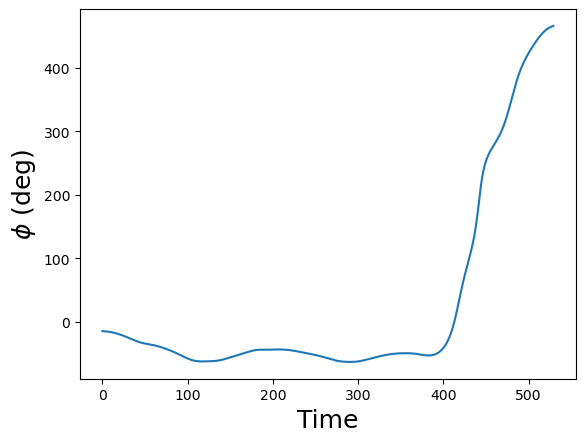

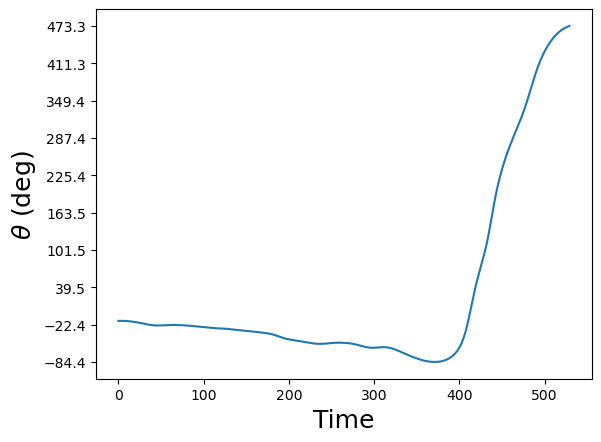

In [8]:
# Assuming your DataFrame 'df' and the relevant data columns exist
# For demonstration, I'll use placeholder DataFrame generation
# df = pd.read_excel("your_data_file.xlsx")

# Calculate phi with adjusted clip usage
phi = unwrap_angle(np.arctan2(bat_z, bat_x))

theta = unwrap_angle(np.arctan2(bat_y , bat_x))

# Plotting, for example, phi to visualize
plt.plot(t,phi-90)
plt.xlabel('Time' ,fontsize = 18)
plt.ylabel(r'$\phi$ (deg)',fontsize = 18)
plt.show()



# Plotting, for example, phi to visualize
plt.plot(t,(theta - 90) )
plt.xlabel('Time' ,fontsize = 18)
plt.ylabel(r'$\theta$ (deg)',fontsize = 18)
# Determine the range of your data and set y-ticks accordingly
theta_adjusted = theta - 90
y_min, y_max = np.min(theta_adjusted), np.max(theta_adjusted)

# Create more y-ticks within the range
yticks = np.linspace(y_min, y_max, 10)  # Creates 15 evenly spaced ticks within the range

plt.yticks(yticks, fontsize=10)  # Apply these ticks with a specific font size

plt.show()


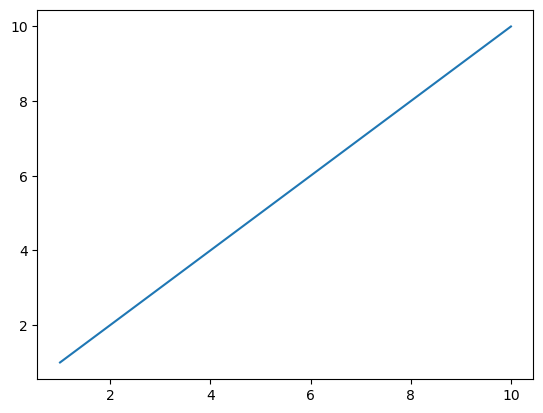

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1,10,10)
y = np.linspace(1,10,10)

plt.plot(x,y)

In [10]:

# =========================
# LEAD VERTICAL GRF
# =========================

alpha = 0.05
t = spm1d.stats.ttest2(YB, YA, equal_var=True)
ti = t.inference(alpha, two_tailed=True, interp=True)
print(ti)


#(2) Plot:
pyplot.close('all')
### plot mean and SD:
pyplot.figure( figsize=(8, 3.5) )
ax = pyplot.axes( (0.1, 0.15, 0.35, 0.8) )
xpos = [50, 60]
spm1d.plot.plot_mean_sd(theta, label='Baseball')
spm1d.plot.plot_mean_sd(YB, label='Softball', linecolor='r', facecolor='r', linestyle='--')
ax.axhline(y=0, color='k', linestyle=':')
ax.vlines(x=xpos, ymin=-25, ymax=40, color='k', linestyle='--', lw=1)
ax.text(-2, 26, 'SFC', fontsize=8)
ax.text(45, 26, 'MER', fontsize=8)
ax.text(59, 26, 'BR', fontsize=8)
ax.text(97, 26, 'MIR', fontsize=8)
ax.set_xlabel('% Swing Motion (Stance-FT)')
# ax.set_ylabel('Power (W/kg)')
ax.set_ylabel(r'Bat XY Angle $\theta$ (N/kg)')
ax.legend(fontsize=8, loc='upper left', frameon=False)
### plot SPM results:
ax     = pyplot.axes((0.55,0.15,0.35,0.8))
ti.plot()
ti.plot_threshold_label(fontsize=8)
ti.plot_p_values(size=8, offset_all_clusters=(10,-0.6))
ax.set_xlabel('% Swing Motion (Stance-FT)')
# ax.set_xlabel('% Stride Phase (MKH-SFC)')
#pyplot.savefig('leadgrfz_spm.png')
pyplot.show()

NameError: name 'YB' is not defined